In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from gensim import models

!pip install dataget
import dataget

In [4]:
import sys
!{sys.executable} -m pip install cmake==3.17.0
!{sys.executable} -m pip install MulticoreTSNE
!{sys.executable} -m pip install umap-learn

from MulticoreTSNE import MulticoreTSNE as tsne
from sklearn.manifold import SpectralEmbedding
from sklearn.decomposition import PCA
from umap import UMAP

### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.

In [5]:
#Preparation of datasets
#mnist dataset
pre_mnist = load_digits()
mnist = pd.DataFrame(pre_mnist.data)

In [6]:
#fashion mnist dataset
__,__, f_mnist_x_test, f_mnist_y_test = dataget.image.fashion_mnist().get()


In [7]:
f_mnist = f_mnist_x_test.reshape(-1, 28*28)

In [8]:
#Coil20
import scipy.io

mat = scipy.io.loadmat("/content/drive/MyDrive/COIL20.mat")
coil20 = mat['X']


In [9]:
#Google news
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

!gzip -d GoogleNews-vectors-negative300.bin.gz

w = models.KeyedVectors.load_word2vec_format(
    '/content/GoogleNews-vectors-negative300.bin', binary=True)

w_vectors = w.wv.vectors


--2021-11-20 15:50:03--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.69.38
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.69.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

  GoogleNews-vector   7%[>                   ] 117.13M  65.5MB/s               ^C
gzip: GoogleNews-vectors-negative300.bin already exists; do you wish to overwrite (y or n)? n
	not overwritten


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':


In [10]:
#Уменьшение размерности датасета из-за нехватки ОЗУ
#При удалении этого блока будет использоваться полный датасет
w_vectors = w_vectors[np.random.randint(w_vectors.shape[0], 
                size=int(w_vectors.shape[0]/60)), :]
print(w_vectors.shape)

(50000, 300)


In [11]:
# Preparation of algorithms
umap = UMAP(random_state = 2)
tsne = tsne(n_jobs=-1, random_state=2)
pca = PCA(n_components=2)

Text(0.5, 1.0, 'G-news')

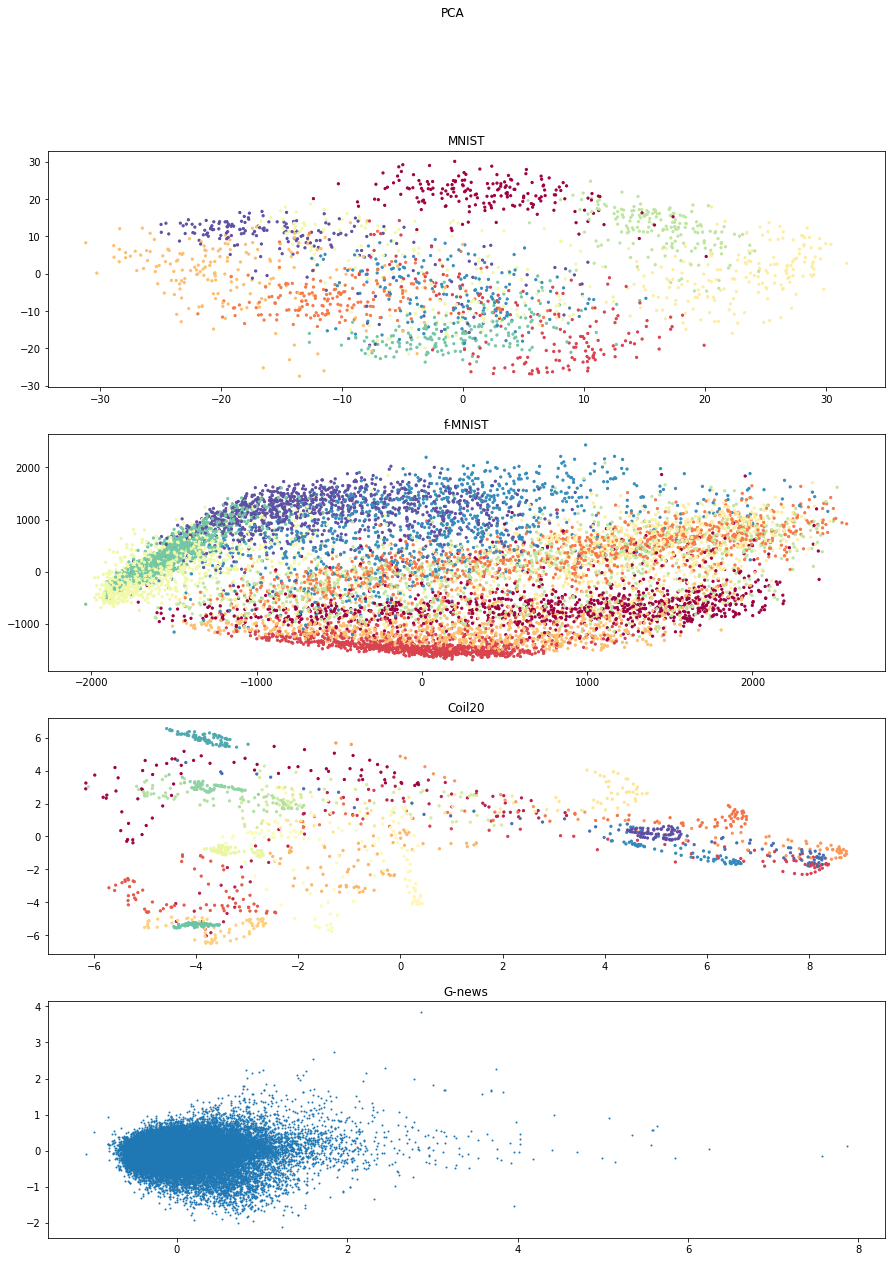

In [16]:
fig, axs = plt.subplots(4, figsize=(15, 20))
fig.suptitle('PCA')

#PCA algorithm for datasets
#mnist

embedding_pca_mnist = pca.fit_transform(mnist)
axs[0].scatter(embedding_pca_mnist[:,0], embedding_pca_mnist[:,1], 
                         cmap = 'Spectral', s = 5, c = pre_mnist.target)
axs[0].set_title('MNIST')

#fashion mnist

embedding_pca_f_mnist = pca.fit_transform(f_mnist)
axs[1].scatter(embedding_pca_f_mnist[:,0], 
                           embedding_pca_f_mnist[:,1], cmap = 'Spectral', s = 5, c = f_mnist_y_test)
axs[1].set_title('f-MNIST')

# Coil20

embedding_pca_coil20 = pca.fit_transform(coil20)
axs[2].scatter(embedding_pca_coil20[:,0], embedding_pca_coil20[:,1], 
                         cmap = 'Spectral', s = 5, c = mat['Y'])
axs[2].set_title('Coil20')

# G-news

embedding_pca_G_news = pca.fit_transform(w_vectors)
axs[3].scatter(embedding_pca_G_news[:,0], embedding_pca_G_news[:,1], 
                         cmap = 'Spectral', s = 1)
axs[3].set_title('G-news')


Text(0.5, 1.0, 'G-news')

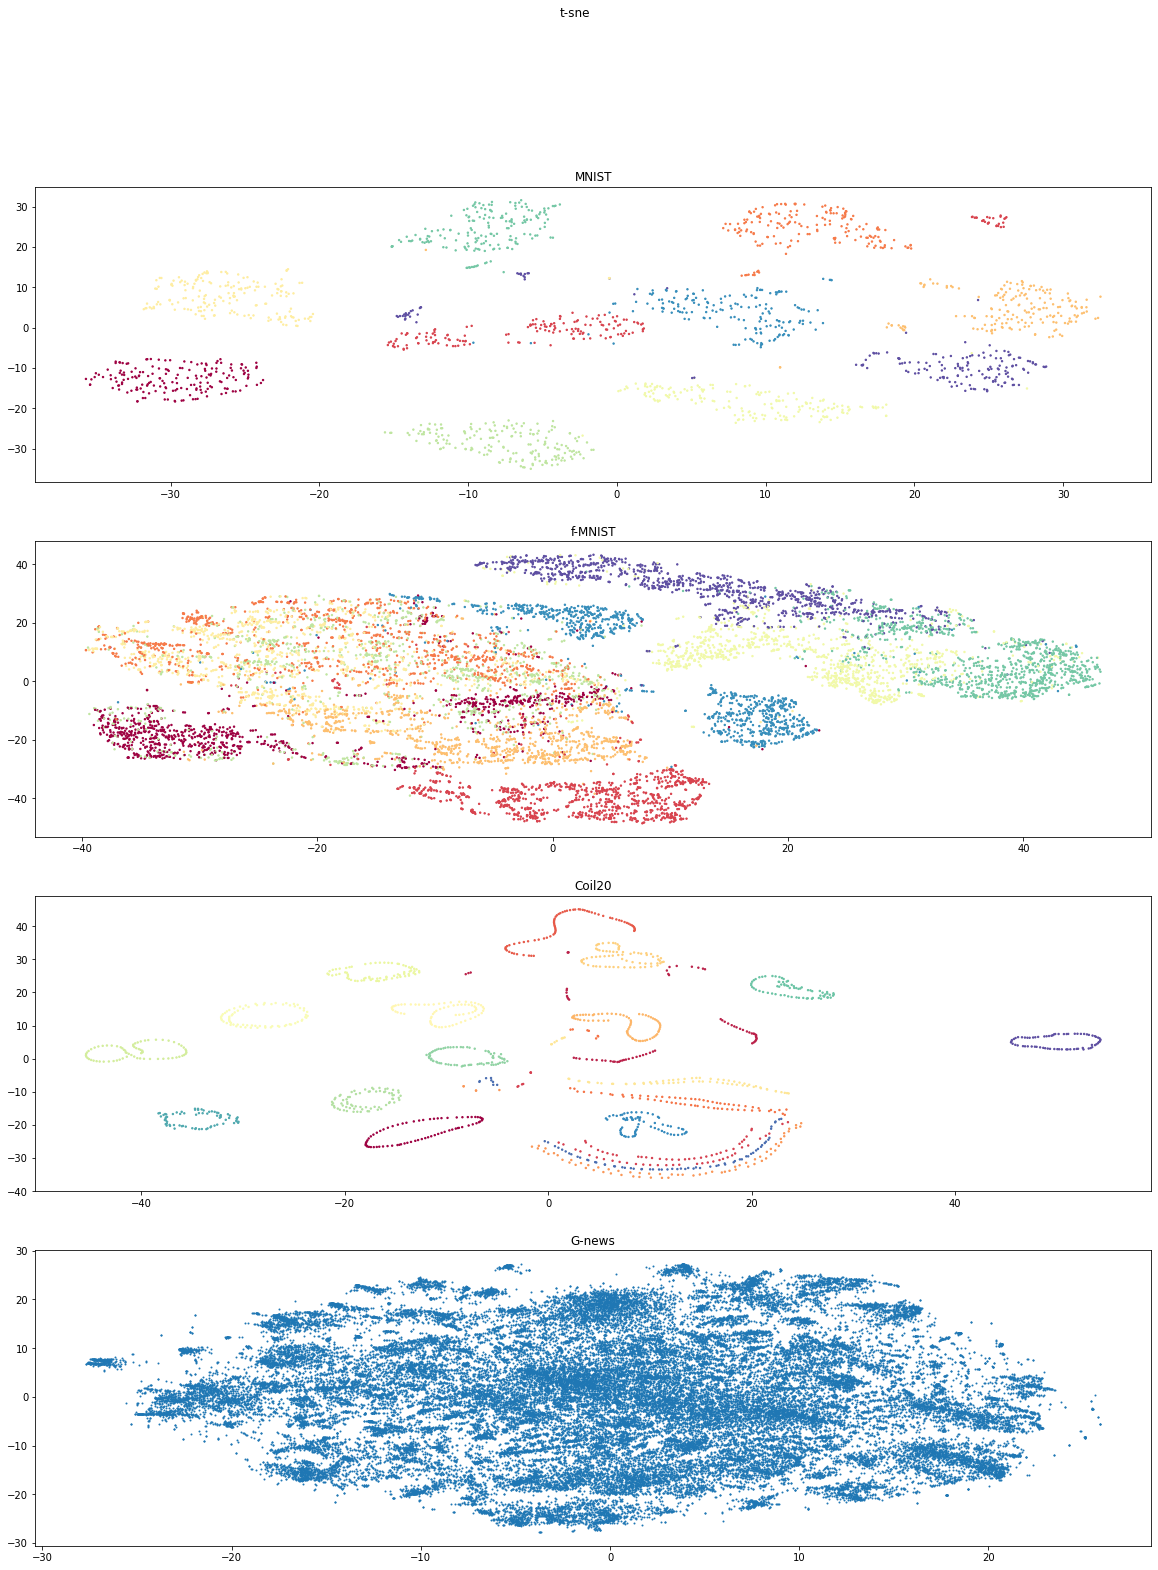

In [17]:
fig, axs = plt.subplots(4, figsize=(20, 25))
fig.suptitle('t-sne')

#t-sne algorithm for datasets
#mnist

embedding_tsne_mnist = tsne.fit_transform(mnist)

axs[0].scatter(embedding_tsne_mnist[:,0], embedding_tsne_mnist[:,1], 
                         cmap = 'Spectral', s = 2, c = pre_mnist.target)
axs[0].set_title('MNIST')

#fashion mnist

embedding_tsne_f_mnist = tsne.fit_transform(f_mnist)
axs[1].scatter(embedding_tsne_f_mnist[:,0], 
                           embedding_tsne_f_mnist[:,1], cmap = 'Spectral', s = 2, c = f_mnist_y_test)
axs[1].set_title('f-MNIST')

#Coil20

embedding_tsne_coil20 = tsne.fit_transform(coil20)
axs[2].scatter(embedding_tsne_coil20[:,0], embedding_tsne_coil20[:,1], 
                         cmap = 'Spectral', s = 2, c = mat['Y'])
axs[2].set_title('Coil20')

#G-news
embedding_tsne_G_news = tsne.fit_transform(w_vectors)
axs[3].scatter(embedding_tsne_G_news[:,0], embedding_tsne_G_news[:,1], 
                         cmap = 'Spectral', s = 1)
axs[3].set_title('G-news')



Text(0.5, 1.0, 'G-news')

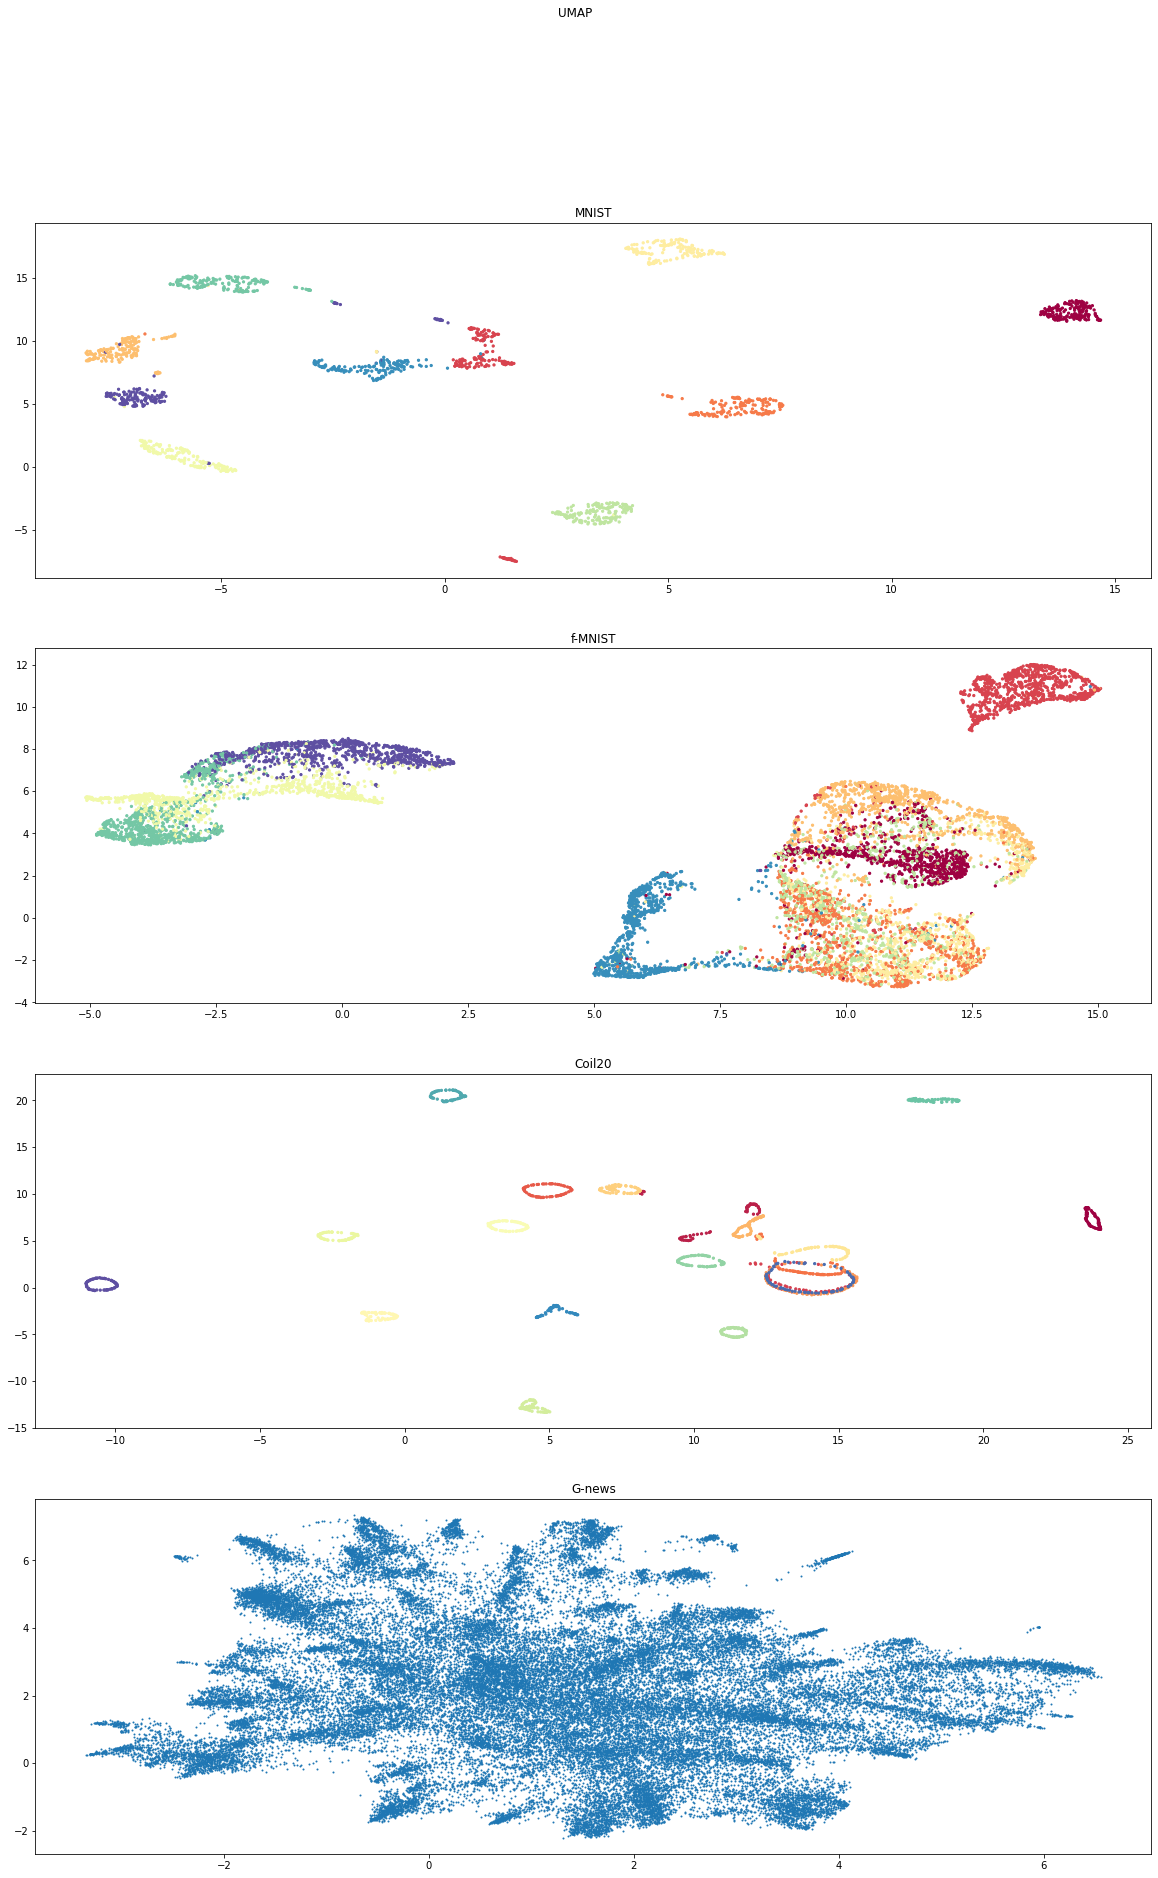

In [15]:
fig, axs = plt.subplots(4, figsize=(20, 30))
fig.suptitle('UMAP')

#UMAP algorithm for datasets
#mnist

embedding_umap_mnist = umap.fit_transform(mnist)
axs[0].scatter(embedding_umap_mnist[:,0], embedding_umap_mnist[:,1], 
                         cmap = 'Spectral', s = 5, c = pre_mnist.target)
axs[0].set_title('MNIST')

#fashion mnist

embedding_umap_f_mnist = umap.fit_transform(f_mnist)
axs[1].scatter(embedding_umap_f_mnist[:,0], 
                           embedding_umap_f_mnist[:,1], cmap = 'Spectral', s = 5, c = f_mnist_y_test)
axs[1].set_title('f-MNIST')

#Coil20

embedding_umap_coil20 = umap.fit_transform(coil20)
axs[2].scatter(embedding_umap_coil20[:,0], embedding_umap_coil20[:,1], 
                         cmap = 'Spectral', s = 5, c = mat['Y'])
axs[2].set_title('Coil20')

#G-news

embedding_umap_G_news = umap.fit_transform(w_vectors)
axs[3].scatter(embedding_umap_G_news[:,0], embedding_umap_G_news[:,1], 
                         cmap = 'Spectral', s = 1)
axs[3].set_title('G-news')